In [1]:
import matplotlib
import pandas
import numpy as np
import matplotlib.pyplot as plt 
import os.path as path
import wget
import pandas as pd
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

**Punto 1.1.1a**

[1.42857143 0.42857143] 2.5354627641855494


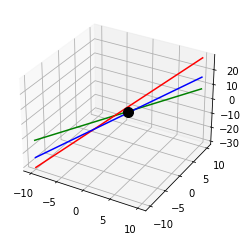

In [11]:
A = np.array([[2, -1],[1, 2],[1, 1]])
B = np.array([2,1,4])
AT = A.T
ATA = np.dot(AT,A)
ATB = np.dot(AT,B)
M = np.append(ATA,ATB)
def GetGaussJordan(M_,b_):
    A = M_.copy()
    b = b_.copy()
    A = np.float_(A)
    b = np.float_(b)
    n = len(b)
    for i in range(n):
        for j in range(i+1,n):
            a = A[j,i]/A[i,i]    
            A[j,:] -= a*A[i,:]
            b[j] -= a*b[i]
    x = b.copy()
    for i in reversed(range(n)):
        for j in range(i+1,n):
            x[i] = (x[i]-A[i,j]*x[j])    
        x[i] /= A[i,i]    
    return x,A,b
sol, NM, Nb = GetGaussJordan(ATA,ATB)
parte1 = np.dot(A,sol)-B
parte2 = parte1**2
parte3 = parte2[0]+parte2[1]+parte2[2]
partef = np.sqrt(parte3)
print(sol,partef)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
def f1(x,y):
    return 2*x - y-2
def f2(x,y):
    return x + 2*y-1
def f3(x,y):
    return x + y-4
xv = np.linspace(-10,10,20)
yv = np.linspace(-10,10,20)
Z1 = f1(xv,yv) 
Z2 = f2(xv,yv)
Z3 = f3(xv,yv)
ax.plot(xv,yv,Z1,"g")
ax.plot(xv,yv,Z2,"r")
ax.plot(xv,yv,Z3,"b")
ax.plot((sol[0]),(sol[1]),0, lw=2, c='k',marker='o',markersize=10 )
plt.show()

**Punto 1.1.1b**

1.4200000000000532 0.430000000000045 2.535547278202478


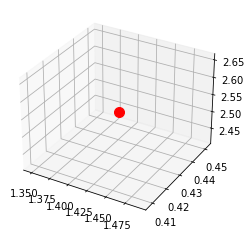

In [12]:
X = np.arange(-5.,5.,0.03)
Y = np.arange(-5.,5.,0.03)
R = []
z = []
mini=1e6
vx,vy=0,0
for i in X:
    for j in Y:
        S1 = (np.dot(A,[i,j])-B)
        S2 = S1**2
        S3 = S2[0]+S2[1]+S2[2]
        Sf = np.sqrt(S3)
        if Sf<=mini:
            mini=Sf
            vx, vy=i,j
    R.append(Sf)
X, Y = np.meshgrid(X, Y)
for i in range(0,len(X[0])):
    lista=[]
    for j in R:
        lista.append(j)
    z.append(lista)
    lista=[]
print(vx,vy,mini)
Z=np.array(z)
fig = plt.figure()
at = fig.add_subplot(1,1,1,projection='3d')
#at.plot_surface(X,Y,Z)
at.plot(vx,vy,mini, lw=2, c='r',marker='o',markersize=10)
plt.show()

**Punto 1.1.2**

100% [..................................................................................] 522 / 522[-5.12918553  2.12503681]


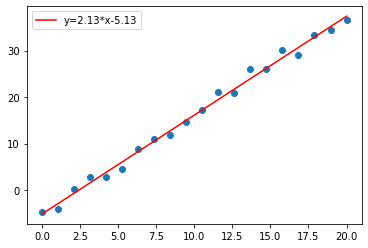

In [4]:
file1 = 'MinimosLineal'
url1 = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
if not path.exists(file1):
    file = wget.download(url1,file1)
df1 = np.loadtxt(file1)
X1 = []
Y1 = []
for i in range(0,len(df1)): 
    x_val = df1[i][0]
    y_val = df1[i][1]
    X1.append(x_val)
    Y1.append(y_val)
pts1 = len(Y1)
x1 = np.array(tuple(X1))
y1 = np.array(tuple(Y1))
dimensiones1=(pts1,2)
P1 = np.ones(dimensiones1).reshape(2,pts1).T
for i in range(0,len(Y1)):
    P1[i][1] = X1[i]
v1 = (np.linalg.inv(P1.T @ P1) @ P1.T) @ y1
b1, m1 = v1
print(v1)
plt.plot(x1, y1, 'o')
plt.plot([x1[0],X1[-1]], [m1*X1[0]+b1,m1*x1[-1]+b1], 'r',label=f"y={round(m1,2)}*x{round(b1,2)}")
plt.legend()

**Punto 1.1.3**

100% [..................................................................................] 521 / 521[1.22132054 6.09075205 2.9565874 ]


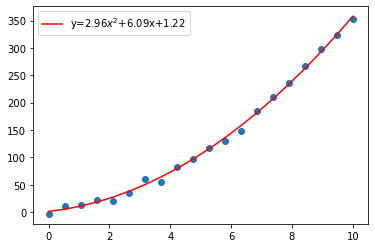

In [5]:
file2 = 'MinimosCuadratico'
url2 = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'
if not path.exists(file2):
    file = wget.download(url2,file2)
df2 = np.loadtxt(file2)
X2 = []
Y2 = []
for i in range(0,len(df2)): 
    x_val = df2[i][0]
    y_val = df2[i][1]
    X2.append(x_val)
    Y2.append(y_val)
pts2 = len(Y2)
x2 = np.array(tuple(X2))
y2 = np.array(tuple(Y2))
dimensiones2=(pts2,3)
P2 = np.ones(dimensiones2).reshape(3,pts2).T
for i in range(0,len(Y2)):
    P2[i][1] = X2[i]
    P2[i][2] = X2[i]**2
v2 = (np.linalg.inv(P2.T @ P2) @ P2.T) @ y2
b2 = v2[0]
print(v2)
plt.plot(x2, y2, 'o')
plt.plot(x2[::], v2[2]*(x2[::]**2)+(v2[1]*x2[::])+b2, 'r',label=f"y={round(v2[2],2)}$x^{2}$+{round(v2[1],2)}x+{round(b2,2)}")
plt.legend()

**Punto 1.1.4**

[-5.12918554  2.12503681]


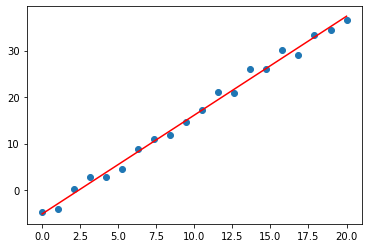

In [6]:
def funcion1(x,a0,a1):
    return a0+a1*x
res1 , cov1 = curve_fit(funcion1, x1, y1)
print(res1)
fig, axes = plt.subplots()
axes.scatter(x1,y1)
axes.plot(x1,funcion1(x1, res1[0], res1[1]),"r")

[1.22131863 6.09075287 2.95658733]


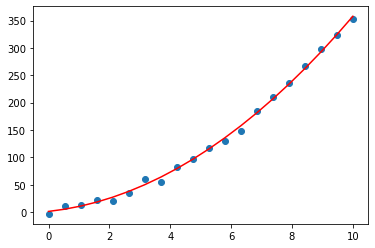

In [7]:
def funcion2(x,a0,a1,a2):
    return a0+(a1*x)+(a2*x**2)
res2 , cov2 = curve_fit(funcion2, x2, y2)
print(res2)
fig, axes = plt.subplots()
axes.scatter(x2,y2)
axes.plot(x2,funcion2(x2, res2[0], res2[1], res2[2]),"r")

In [8]:
Dif1=v1-res1
Dif2=v2-res2
print(Dif1,Dif2)

[ 1.36626896e-08 -1.09690435e-09] [ 1.90758088e-06 -8.22807556e-07  7.01037486e-08]


**Punto 1.2**

**1.2a**

In [9]:
Funciones1 = np.array([lambda x1,x2: np.log((x1**2)+(x2**2))-np.sin(x1*x2) - np.log(2)-np.log(np.pi),
                      lambda x1,x2: np.exp(x1-x2)+np.cos(x1*x2)])
def VectorFunciones1(Funciones1,P1):
    dim = len(Funciones1)
    v = np.zeros(dim)
    for i in range(dim):
        v[i] = Funciones1[i](P1[0],P1[1])
    return v
def F1(Funciones1,P1):
    v = VectorFunciones1(Funciones1,P1)
    return 0.5*np.sum(v**2)
def Jacob1(Funciones1,P1,h=0.001):
    dim = len(Funciones1)
    J = np.zeros( (dim,dim) )
    for i in range(dim):
        J[i,0] = (Funciones1[i](P1[0]+h,P1[1]) - Funciones1[i](P1[0]-h,P1[1]) )/(2*h)  
        J[i,1] = (Funciones1[i](P1[0],P1[1]+h) - Funciones1[i](P1[0],P1[1]-h) )/(2*h)  
    return J.T
def Solucion(Funciones1,P1,lr=0.001, error=1e-4, itmax = int(1e4)):
    it = 0
    d = 1
    f = []
    while d > error and it < itmax:
        it += 1
        AF = F1(Funciones1,P1)
        J = Jacob1(Funciones1,P1)
        VectorF = VectorFunciones1(Funciones1,P1)
        P1 -= lr*np.dot(J,VectorF)
        NF = F1(Funciones1,P1)
        f.append(NF)
        d = np.abs(AF-NF)/NF
    return P1,it
P1 = [2,2]
Valor1,it1 = Solucion(Funciones1,P1)
print(Valor1,it1)


[1.77245385 1.77245385] 10000


**1.2b**

In [10]:
Funciones2 = np.array([lambda x1,x2,x3: 6*x1-2*np.cos(x2*x3)-1,
     lambda x1,x2,x3: 9*x2+np.sqrt((x1**2)+np.sin(x3)+1.06)+0.9,
     lambda x1,x2,x3: 60*x3+3*np.exp(-x1*x2)+10*np.pi-3])


def F2(Funciones2,P2):
    
    dim = len(Funciones2)
    
    v = np.zeros(dim)
    
    for i in range(dim):
        v[i] = Funciones2[i](P2[0],P2[1],P2[2])
        
    return v
def Jacob2(Funciones2,P2,h=0.001):
    dim = len(Funciones2)
    J = np.zeros( (dim,dim) )
    for i in range(dim):
        J[i,0] = (Funciones2[i](P2[0]+h,P2[1],P2[2]) - Funciones2[i](P2[0]-h,P2[1],P2[2]) )/(2*h)  
        J[i,1] = (Funciones2[i](P2[0],P2[1]+h,P2[2]) - Funciones2[i](P2[0],P2[1]-h,P2[2]) )/(2*h)  
        J[i,2] = (Funciones2[i](P2[0],P2[1],P2[2]+h) - Funciones2[i](P2[0],P2[1],P2[2]-h) )/(2*h)
    return J.T
def NewtonRaphson(Funciones2,P2,error=1e-10,itmax=1000):
    it = 0
    d = 1
    dvector = []
    while d > error and it < itmax:
        it += 1
        rc = P2
        NF = F2(Funciones2,P2)
        J = Jacob2(Funciones2,P2)
        InvJ = np.linalg.inv(J)
        P2 = rc - np.dot(InvJ,NF)
        d = np.linalg.norm(P2-rc)
        dvector.append(d)       
    return P2,it,dvector

P2 = [0,0,0]
P2,it2,distancias = NewtonRaphson(Funciones2,P2)
print(P2,it2)

[ 0.49814468 -0.1996059  -0.52882598] 12
